In [2]:
!pip3 install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\rupa\appdata\roaming\python\python36\site-packages (0.4.1)


You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import skfuzzy as fuzz

In [4]:
import numpy as np

In [5]:
my_data = np.genfromtxt('dataset/mat_csv.csv', delimiter=',')

In [6]:
my_data.shape

(48, 264)

In [79]:
cntr, u_orig, _, _, _, _, _ = fuzz.cmeans(my_data, 2, 0.9, 
                                          error = 0.001, maxiter = 10000)

In [80]:
cntr.shape

(2, 48)

In [81]:
cntr[0, 40:45] == cntr[1, 40:45]

array([ True,  True, False, False, False])

In [82]:
np.argmax(cntr[0])

43

In [83]:
cntr[0].argsort()[-20:][::-1] == cntr[1].argsort()[-20:][::-1]

array([ True,  True, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True])

In [60]:
cntr[1].argsort()[-10:][::-1]

array([43, 42, 45, 46, 15, 12, 44,  7, 19, 13], dtype=int64)

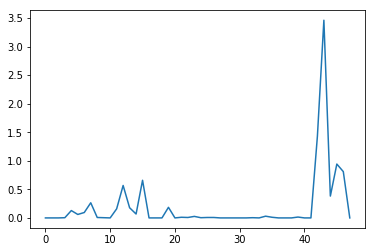

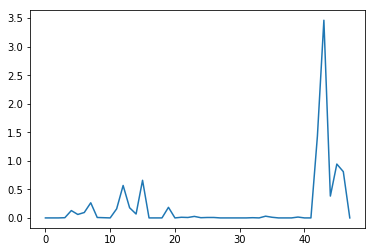

In [55]:
for j in range(2):
    plt.figure()
    plt.plot([i for i in range(48)], cntr[j])
    plt.show()

In [25]:
import matplotlib.pyplot as plt

In [26]:
u_orig

array([[0.50396502, 0.50396502, 0.50396502, 0.50385875, 0.50132923,
        0.50255975, 0.50185644, 0.49972541, 0.50359515, 0.50384914,
        0.50396502, 0.50002222, 0.49934839, 0.49998764, 0.50199926,
        0.4995996 , 0.50396502, 0.50396502, 0.50396502, 0.50051487,
        0.50396502, 0.50368452, 0.50399991, 0.5030727 , 0.50390575,
        0.50390277, 0.50385735, 0.50396502, 0.50396502, 0.50396502,
        0.50396502, 0.50396502, 0.50384015, 0.50396502, 0.5028953 ,
        0.50367711, 0.50396502, 0.50396502, 0.50396502, 0.50353886,
        0.50396502, 0.50396502, 0.49980495, 0.49982353, 0.49978108,
        0.49957323, 0.49970561, 0.50396502],
       [0.49603498, 0.49603498, 0.49603498, 0.49614125, 0.49867077,
        0.49744025, 0.49814356, 0.50027459, 0.49640485, 0.49615086,
        0.49603498, 0.49997778, 0.50065161, 0.50001236, 0.49800074,
        0.5004004 , 0.49603498, 0.49603498, 0.49603498, 0.49948513,
        0.49603498, 0.49631548, 0.49600009, 0.4969273 , 0.49609425,
   

IndexError: index 48 is out of bounds for axis 1 with size 48

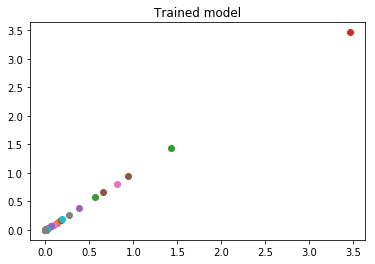

In [21]:
fig2, ax2 = plt.subplots()
#ax2.axis([-0.001, ])
ax2.set_title('Trained model')
for j in range(50):
    ax2.plot(cntr[0, j],
             cntr[1, j], 'o',
             label='series ' + str(j))

In [87]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [107]:
num_clusters = [i for i in range(2, 205, 5)]
mem_values = np.linspace(0, 0.99, 10)
errors = np.linspace(0, 0.001, 10)
iters = [i for i in range(500, 1001, 500)]

In [103]:
len(iters)

1

In [105]:
len(num_clusters)

41

In [106]:
4100/3600

1.1388888888888888

In [98]:
60*60*2

7200

In [111]:
data_to_save = [] #number of clusers, mem_val, error value, centers
for cluster in num_clusters:
    print("Clustering for " + str(cluster) + " clusters")
    for mem in mem_values:
        for err in errors:
            cntr, u_orig, _, _, _, _, _ = fuzz.cmeans(my_data, cluster, mem, 
                                          error = err, maxiter = 10000)
            data_to_save.append([cluster, mem, err, cntr])

Clustering for 2 clusters
Clustering for 7 clusters
Clustering for 12 clusters
Clustering for 17 clusters
Clustering for 22 clusters
Clustering for 27 clusters
Clustering for 32 clusters
Clustering for 37 clusters
Clustering for 42 clusters
Clustering for 47 clusters
Clustering for 52 clusters
Clustering for 57 clusters
Clustering for 62 clusters
Clustering for 67 clusters
Clustering for 72 clusters
Clustering for 77 clusters
Clustering for 82 clusters
Clustering for 87 clusters
Clustering for 92 clusters
Clustering for 97 clusters
Clustering for 102 clusters
Clustering for 107 clusters
Clustering for 112 clusters
Clustering for 117 clusters
Clustering for 122 clusters
Clustering for 127 clusters
Clustering for 132 clusters
Clustering for 137 clusters
Clustering for 142 clusters
Clustering for 147 clusters
Clustering for 152 clusters
Clustering for 157 clusters
Clustering for 162 clusters
Clustering for 167 clusters
Clustering for 172 clusters
Clustering for 177 clusters
Clustering for

In [110]:
import pickle

In [114]:
pickle.dump(data_to_save, open('cluster_centers.csv', 'wb'))

In [ ]:
data_to_save[0]

In [ ]:
len(data_to_save)